한글 폰트 설치

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#csv파일 경로 저장
file_path_1 = '/content/서울시 읍면동마스터 정보.csv'
file_path_2 = '/content/서울시 행정동별 지하철 총 승차 승객수 정보.csv' #일별 승객수 파악가능, 지하철역별 승객수가 아닌 행정동별 지하철 승객수
file_path_3 = '/content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv' #지하철역별 승객수 파악가능, 일별이 아닌 월별 승객수

#csv파일 데이터 프레임으로 변환
town_info = pd.read_csv(file_path_1, encoding = 'cp949')
town_subway_info = pd.read_csv(file_path_2, encoding = 'cp949')
subway_info = pd.read_csv(file_path_3, encoding = 'cp949')

#subway_info의 승차 하차 값 합치기
subway_info.drop('작업일자', axis = 1, inplace = True)

for i in range(24):
  start_hour = str(i).zfill(2)
  end_hour = str(i + 1).zfill(2)

  p_in = f'{start_hour}시-{end_hour}시 승차인원'
  p_out = f'{start_hour}시-{end_hour}시 하차인원'

  end_hour = str((i + 1)%24).zfill(2)
  new_columns = f'{start_hour}시~{end_hour}시'

  subway_info[new_columns] = subway_info[p_in] + subway_info[p_out]
  subway_info.drop([p_in, p_out], axis = 1, inplace = True)

#컴럼명 변경
town_info_columns = ['행정동_ID', '행정동_명칭', '자치구_명칭', '시도_명칭']
town_subway_info_columns = ['기준_날짜', '행정동_ID', '승객수',
                     '00시~01시', '01시~02시', '02시~03시', '03시~04시', '04시~05시', '05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시', '11시~12시',
                     '12시~13시','13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시', '23시~00시']

town_info.columns = town_info_columns
town_subway_info.columns = town_subway_info_columns

#데이터 규합
info_integre = pd.merge(town_info, town_subway_info, on = '행정동_ID')

#결측값 제거
info_integre.dropna(subset = ['승객수'], inplace = True) #지하철 승객수가 0인 행정동 제거 정보

#print(town_info)
#print(town_subway_info)
#print(subway_info)
#print(info_integre)

          행정동_ID 행정동_명칭 자치구_명칭 시도_명칭     기준_날짜      승객수  00시~01시  01시~02시  \
739     11250760   상일1동    강동구    서울  20251024  16979.0     31.0      0.0   
740     11250760   상일1동    강동구    서울  20251023  16692.0     18.0      0.0   
741     11250760   상일1동    강동구    서울  20251022  16888.0     19.0      0.0   
742     11250760   상일1동    강동구    서울  20251021  16737.0     20.0      0.0   
743     11250760   상일1동    강동구    서울  20251020  16507.0     22.0      0.0   
...          ...    ...    ...   ...       ...      ...      ...      ...   
590088   1101053    사직동    종로구    서울  20220102  16809.0      0.0      1.0   
590089   1101053    사직동    종로구    서울  20220101  16163.0      0.0      0.0   
590090   1101053    사직동    종로구    서울  20211231  41189.0      0.0      0.0   
590091   1101053    사직동    종로구    서울  20211230  48169.0      0.0      0.0   
590092   1101053    사직동    종로구    서울  20211130  50003.0      1.0      0.0   

        02시~03시  03시~04시  ...  14시~15시  15시~16시  16시~17시  17시~18시  18시~19시 

데이터 시각화

In [ ]:
#원하는 날짜와 원하는 자치구의 지하철 이용정보를 시각화
#원하는 날짜의 지하철 이용정보
day_label = [20251004] #원하는 날짜 배열
info_integre_custom = info_integre.loc[info_integre['기준_날짜'].isin(day_label)]

#원하는 자치구 지하철 이용정보
town_label = ['강남구'] #원하는 자치구 배열
info_integre_custom = info_integre_custom.loc[info_integre_custom['자치구_명칭'].isin(town_label)]

#데이터 melt
#시간대별로 행을 나눠 시각화 하기 유리하게 데이터 변환
id_cols = ['기준_날짜', '행정동_ID', '행정동_명칭', '자치구_명칭', '시도_명칭', '승객수']
hour_cols = ['00시~01시', '01시~02시', '02시~03시', '03시~04시', '04시~05시', '05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시', '11시~12시',
             '12시~13시','13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시', '23시~00시']

info_integre_melt = pd.melt(info_integre_custom, id_vars = id_cols, value_vars = hour_cols, var_name = '시간대', value_name = '시간대별_승객수')

print(info_integre_melt)

        기준_날짜    행정동_ID 행정동_명칭 자치구_명칭 시도_명칭      승객수      시간대  시간대별_승객수
0    20251004  11230800   개포2동    강남구    서울   4550.0  00시~01시       1.0
1    20251004  11230790   대치2동    강남구    서울  34282.0  00시~01시       0.0
2    20251004  11230770   압구정동    강남구    서울  29520.0  00시~01시       1.0
3    20251004  11230750    수서동    강남구    서울  21086.0  00시~01시      30.0
4    20251004  11230720   일원본동    강남구    서울   4181.0  00시~01시       0.0
..        ...       ...    ...    ...   ...      ...      ...       ...
331  20251004  11230590   삼성2동    강남구    서울   7960.0  23시~00시     100.0
332  20251004  11230580   삼성1동    강남구    서울  18644.0  23시~00시     168.0
333  20251004  11230530   논현2동    강남구    서울  15734.0  23시~00시     258.0
334  20251004  11230520   논현1동    강남구    서울  46919.0  23시~00시     996.0
335  20251004  11230511   개포3동    강남구    서울   5410.0  23시~00시      27.0

[336 rows x 8 columns]


[Text(0.5, 0, '승객수'), Text(0, 0.5, '시간대'), Text(0.5, 1.0, '행정동별 지하철 승객수')]

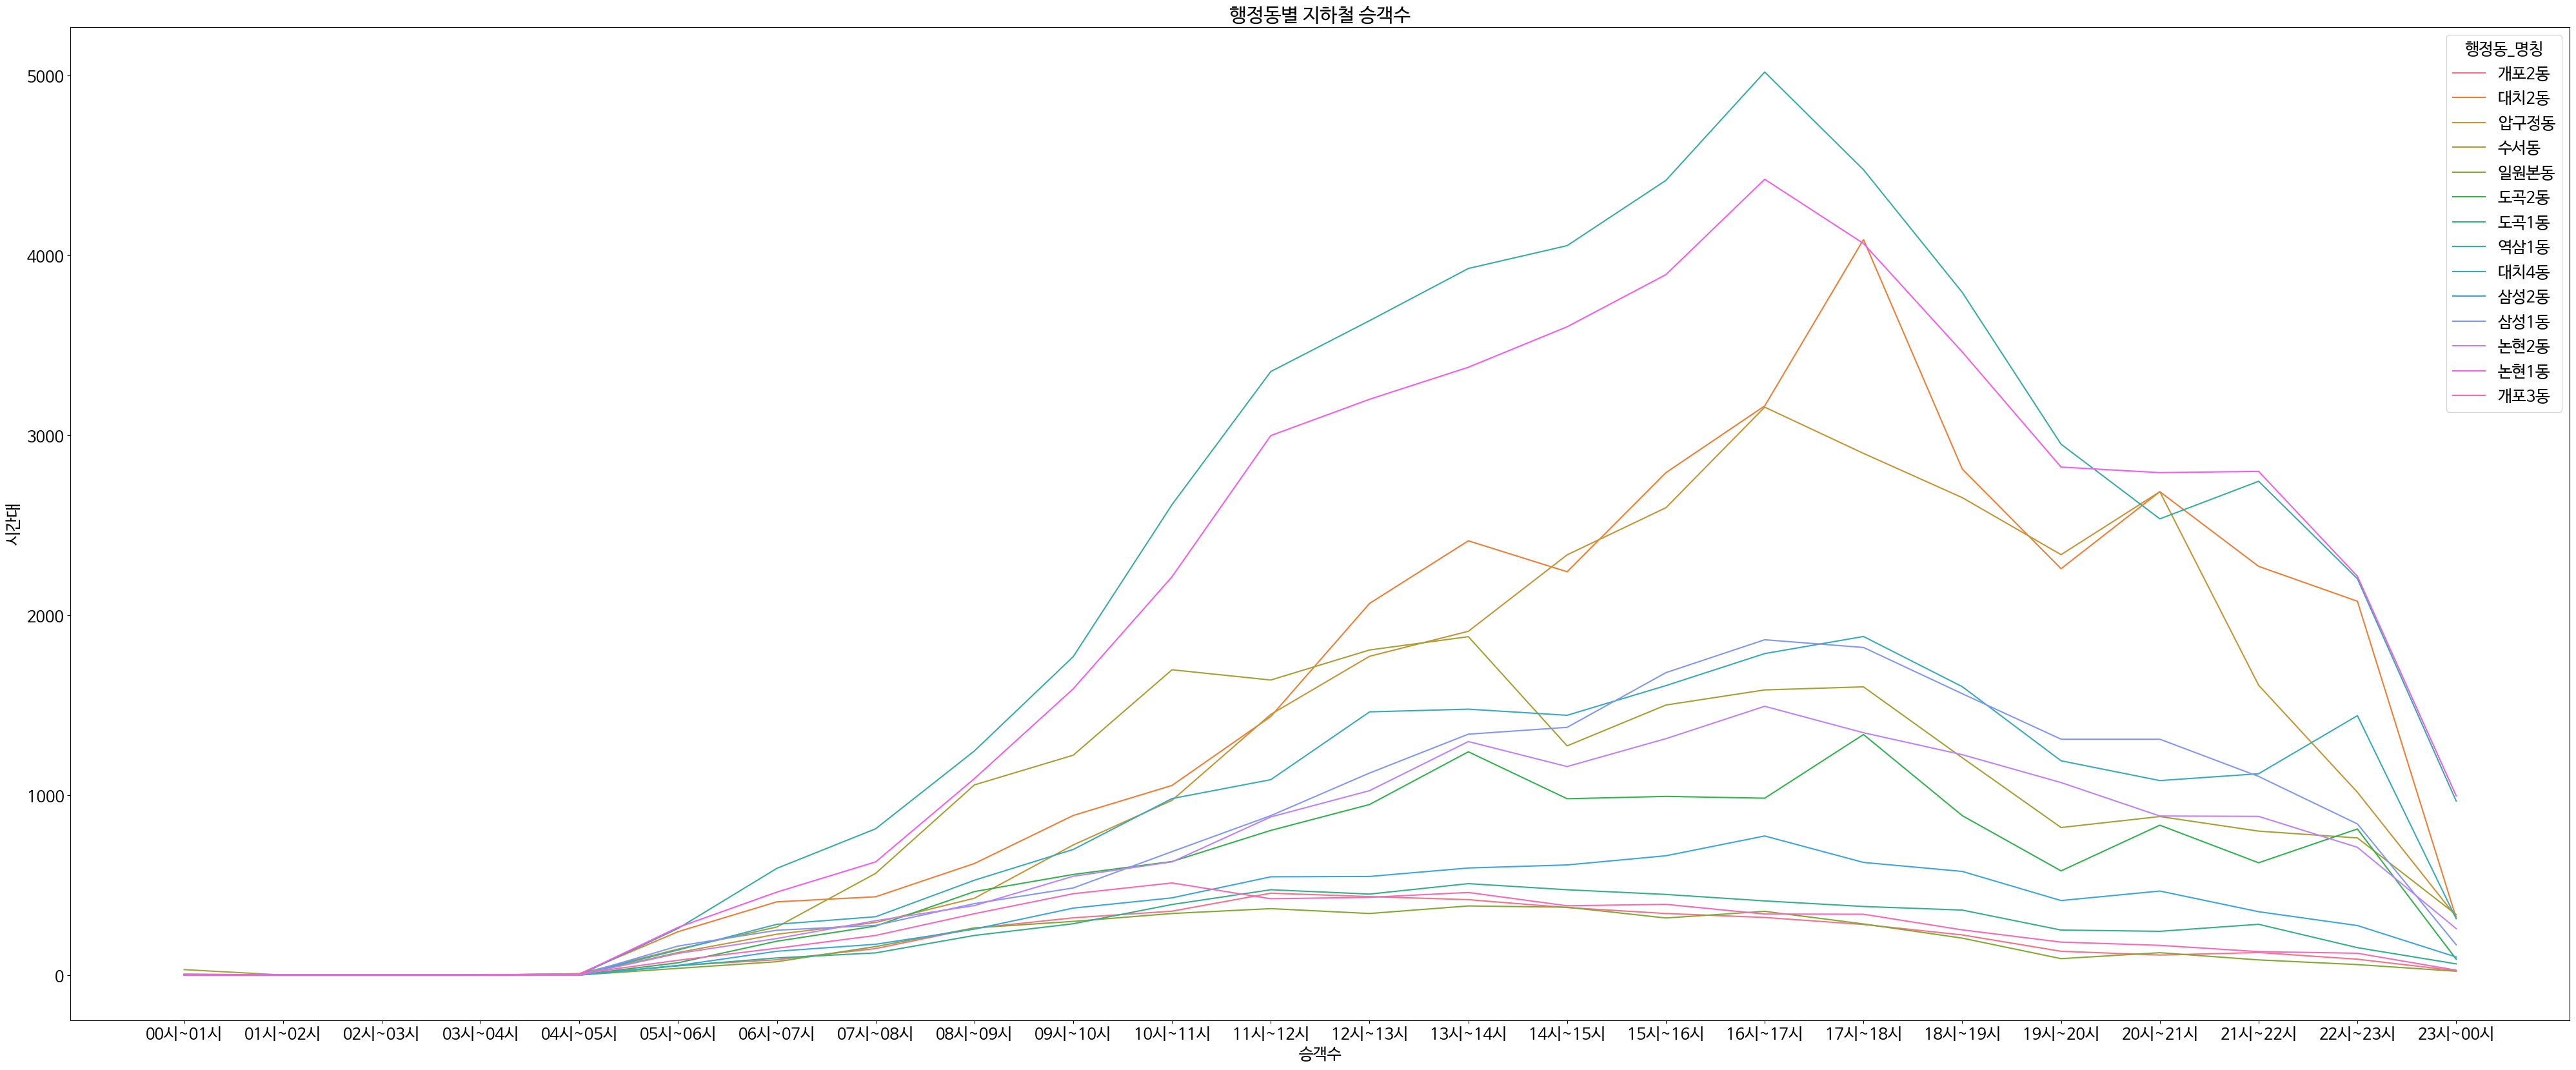

In [ ]:
#시각화
#원하는 자치구에 속한 행정동들의 지하철 승객수를 시간대별로 시각화
palette = sns.color_palette('hls', len(info_integre_melt['행정동_명칭'].unique()))
plt.figure(figsize = (50, 20))
ax = sns.lineplot(data = info_integre_melt, x = '시간대', y = '시간대별_승객수', hue = '행정동_명칭', errorbar = None)
ax.set(xlabel = '시간대', ylabel = '승객수', title = '행정동별 지하철 승객수 (' + *town_label + ')')


In [ ]:
#원하는 월과 원하는 지하철 호수의 이용정보를 시각화
#원하는 월의 지하철 이용정보
month_label = [202505] #원하는 월 배열
subway_info_cutom = subway_info.loc[subway_info['사용월'].isin(month_label)]

#원하는 자치구 지하철호선 이용정보
line_label = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'] #원하는 지하철 호선 배열
subway_info_cutom = subway_info_cutom.loc[subway_info_cutom['호선명'].isin(line_label)]

#데이터 melt
#시간대별로 행을 나눠 시각화 하기 유리하게 데이터 변환
id_cols = ['사용월', '호선명', '지하철역']
hour_cols = ['00시~01시', '01시~02시', '02시~03시', '03시~04시', '04시~05시', '05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시', '11시~12시',
             '12시~13시','13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시', '23시~00시']

subway_info_melt = pd.melt(subway_info_cutom, id_vars = id_cols, value_vars = hour_cols, var_name = '시간대', value_name = '시간대별_승객수')

[Text(0.5, 0, '승객수'), Text(0, 0.5, '시간대'), Text(0.5, 1.0, '호선별 지하철 승객수')]

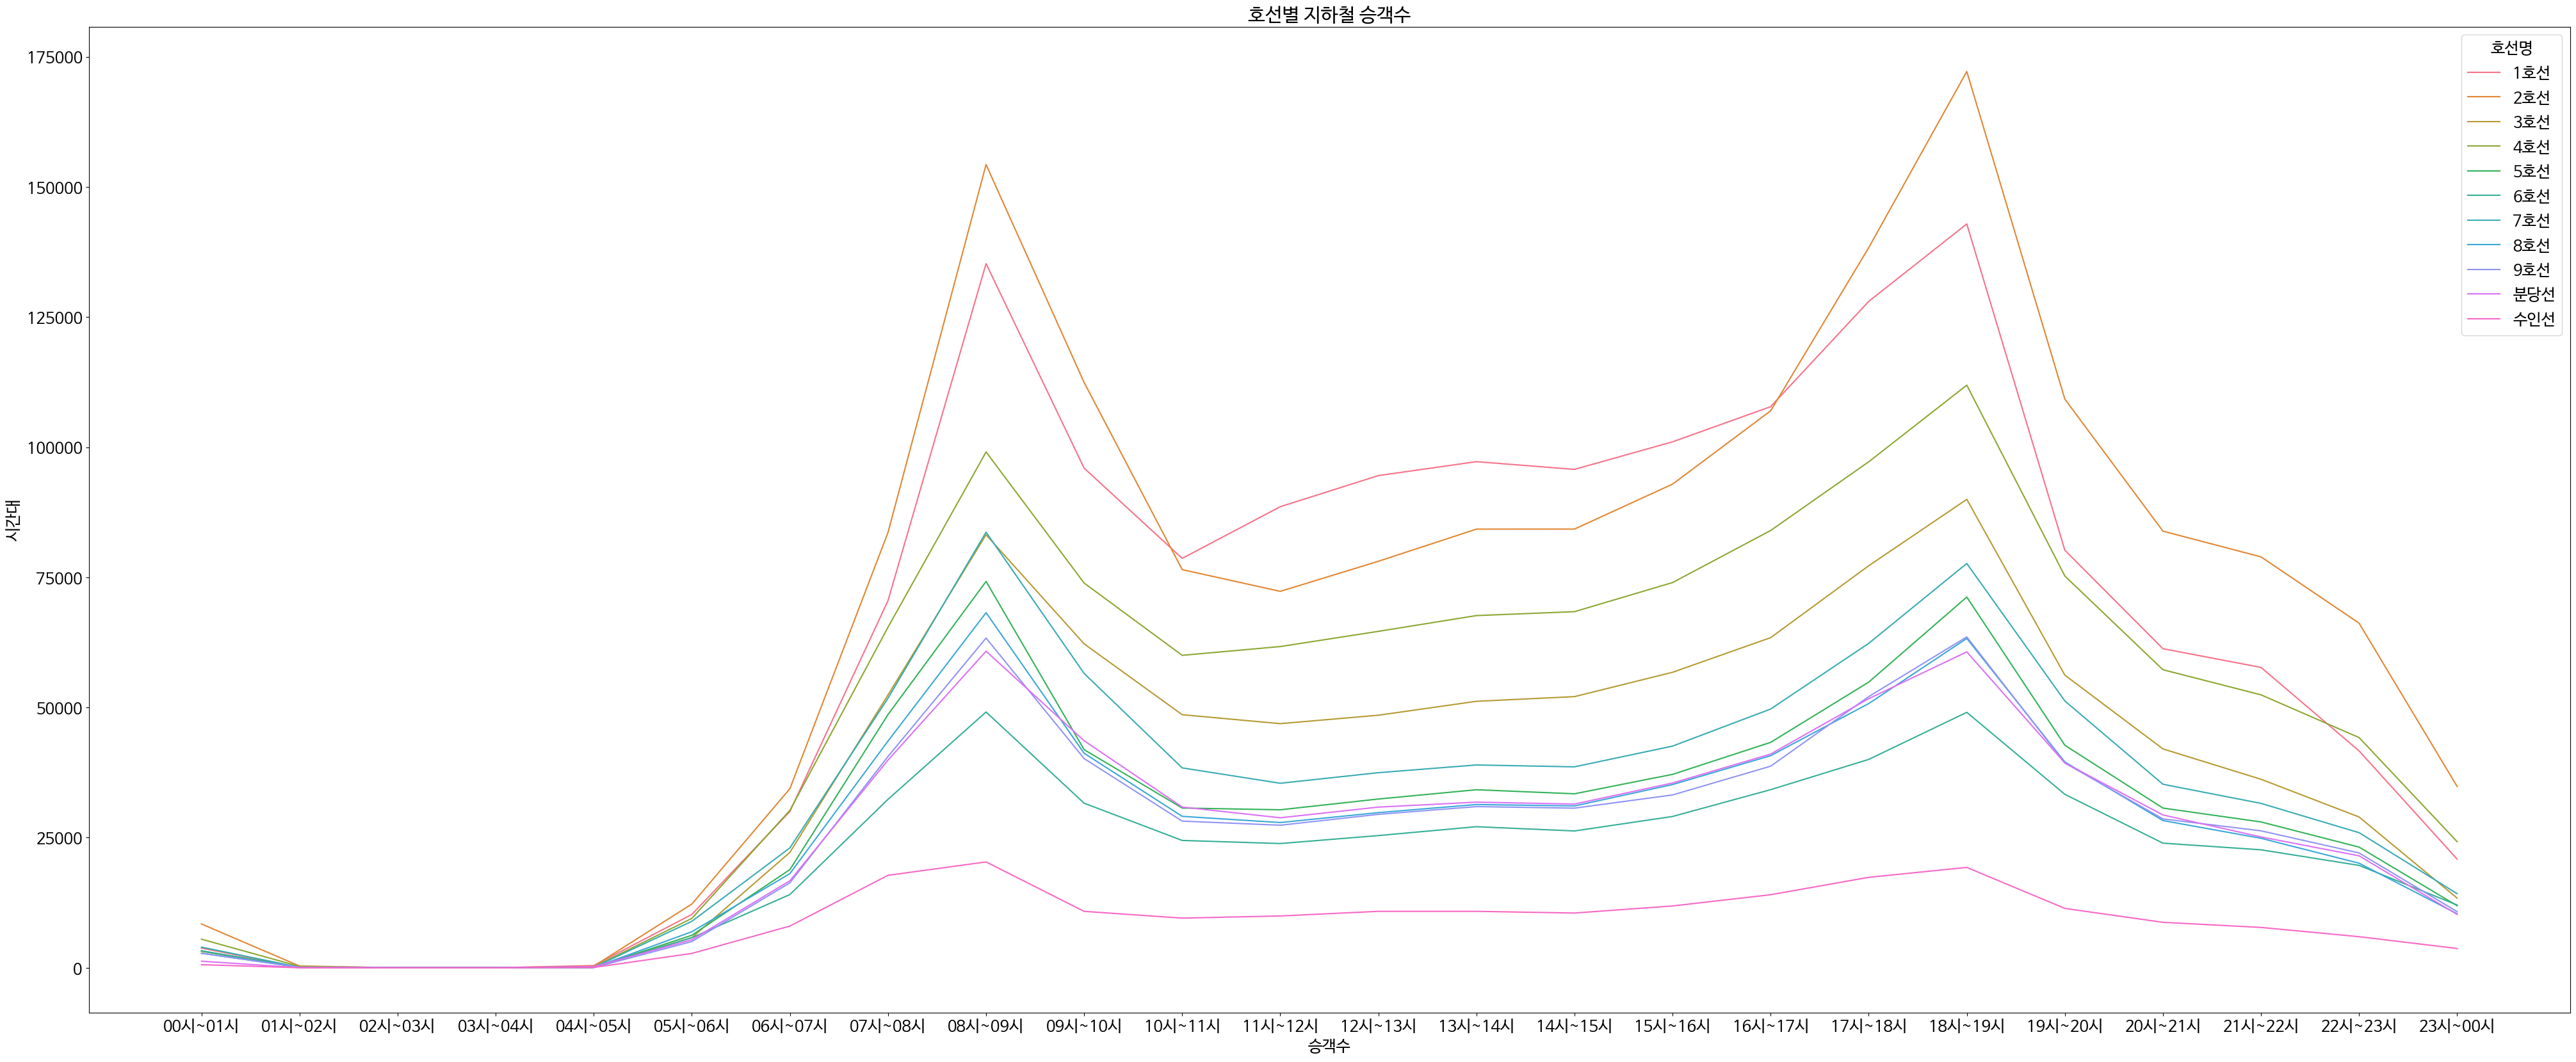

In [ ]:
#시각화
#원하는 호선의 지하철 승객수를 시간대별로 시각화
plt.figure(figsize = (50, 20))
ax = sns.lineplot(data = subway_info_melt, x = '시간대', y = '시간대별_승객수', hue = '호선명', errorbar = None)
ax.set(xlabel = '시간대', ylabel = '승객수', title = *month_label + '월 호선별 지하철 승객수')

In [ ]:
#원하는 월과 원하는 지하철 호수의 이용정보를 시각화
#원하는 월의 지하철 이용정보
month_label = [202505] #원하는 월 배열
subway_info_cutom = subway_info.loc[subway_info['사용월'].isin(month_label)]

#원하는 자치구 지하철호선 이용정보
line_label = ['1호선'] #원하는 지하철 호선 배열
subway_info_cutom = subway_info_cutom.loc[subway_info_cutom['호선명'].isin(line_label)]



#데이터 melt
#시간대별로 행을 나눠 시각화 하기 유리하게 데이터 변환
id_cols = ['사용월', '호선명', '지하철역']
hour_cols = ['00시~01시', '01시~02시', '02시~03시', '03시~04시', '04시~05시', '05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시', '11시~12시',
             '12시~13시','13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시', '23시~00시']

subway_info_melt = pd.melt(subway_info_cutom, id_vars = id_cols, value_vars = hour_cols, var_name = '시간대', value_name = '시간대별_승객수')

In [ ]:
#시각화
#원하는 호선의 지하철역별 승객수를 시간대별로 시각화
#subplot기능을 활용하여 1호선 ~ 9호선 각각 출력
plt.figure(figsize = (50, 20))
ax = sns.lineplot(data = subway_info_melt, x = '시간대', y = '시간대별_승객수', hue = '지하철역', errorbar = None)
ax.set(xlabel = '시간대', ylabel = '승객수', title = '지하철역별 지하철 승객수 (' + *line_label + ')')